
# Animated histogram

Use histogram's `.BarContainer` to draw a bunch of rectangles for an animated
histogram.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = np.linspace(-4, 4, 100)

# histogram our data with numpy
data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)

To animate the histogram, we need an ``animate`` function, which generates
a random set of numbers and updates the heights of rectangles. We utilize a
python closure to track an instance of `.BarContainer` whose `.Rectangle`
patches we shall update.



In [2]:
def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

Using :func:`~matplotlib.pyplot.hist` allows us to get an instance of
`.BarContainer`, which is a collection of `.Rectangle` instances. Calling
``prepare_animation`` will define ``animate`` function working with supplied
`.BarContainer`, all this is used to setup `.FuncAnimation`.



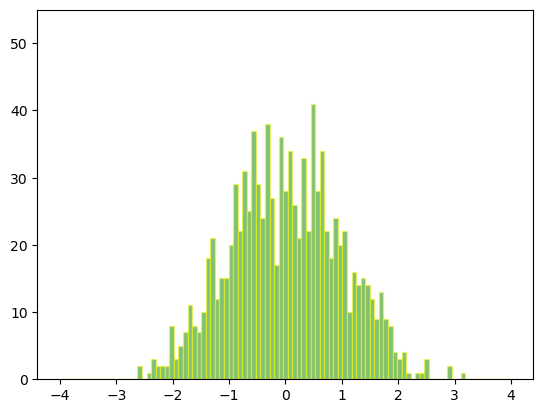

In [3]:
# Output generated via `matplotlib.animation.Animation.to_jshtml`.

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.show()